## **Problem:** interpolation from one grid to another (for comparison or initial/boundary conditions generation)

### Example: Copernicus PHY reanalysis for the Baltic Sea and MOM 3 n.m. grid from IOW setup

In [1]:
# imports
import numpy as np
from scipy.interpolate import interp2d
import xarray as xr
import matplotlib.pyplot as pl
%matplotlib inline

In [5]:
reanalysis = xr.open_dataset('/silod4/naumov/grid_interpolation/test_4d.nc') #copernicus temperature field
mom = xr.open_dataset('/silod3/thomas/pocNP/V04/R25/input/grid_spec.nc') #mom grid

In [15]:
reanalysis = reanalysis.sel(latitude=slice(52,None))

In [16]:
reanalysis

<xarray.Dataset>
Dimensions:    (time: 2, longitude: 383, latitude: 417, depth: 56)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 1993-02-15
  * longitude  (longitude) float32 9.014 9.069 9.125 9.18 ... 30.12 30.18 30.24
  * latitude   (latitude) float32 52.02 52.06 52.09 52.12 ... 65.82 65.86 65.89
  * depth      (depth) float32 1.501 4.513 7.54 10.58 ... 666.8 688.9 711.1
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
Attributes: (12/26)
    CDI:                                        Climate Data Interface versio...
    Conventions:                                CF-1.5
    history:                                    Mon Jul 11 16:35:59 2022: cdo...
    source:                                     SMHI reanalysis run NORDIC-NS...
    institution:                                Swedish Meterological and Hyd...
    references:                                 http://www.smhi.se
    ...                                         ...
    start_date:                                 2020-12-01 UTC
    stop_date:                                  2020-12-01 UTC
    start_time:                                 00:00 UTC
    stop_time:                                  00:00 UTC
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    CDO:                                        Climate Data Operators versio...

In [17]:
mom

<xarray.Dataset>
Dimensions:        (zt: 152, zb: 152, grid_x_T: 224, grid_y_T: 242, grid_x_C: 224, grid_y_C: 242, vertex: 4, i_atmXocn: 13923, i_atmXlnd: 40285, i_lndXocn: 13923, xba: 225, yba: 243, xta: 224, yta: 242, xbl: 225, ybl: 243, xtl: 224, ytl: 242, xto: 224, yto: 242)
Coordinates: (12/17)
  * zt             (zt) float64 0.25 0.7508 1.257 1.771 ... 263.0 265.0 267.0
  * zb             (zb) float64 0.5004 1.004 1.514 2.034 ... 264.0 266.0 268.0
  * grid_x_T       (grid_x_T) float64 8.283 8.383 8.483 ... 30.38 30.48 30.58
  * grid_y_T       (grid_y_T) float64 53.86 53.91 53.96 ... 65.81 65.86 65.91
  * grid_x_C       (grid_x_C) float64 8.333 8.433 8.533 ... 30.43 30.53 30.63
  * grid_y_C       (grid_y_C) float64 53.88 53.93 53.98 ... 65.83 65.88 65.93
    ...             ...
  * xbl            (xbl) float64 8.233 8.333 8.433 8.533 ... 30.43 30.53 30.63
  * ybl            (ybl) float64 53.83 53.88 53.93 53.98 ... 65.83 65.88 65.93
  * xtl            (xtl) float64 8.283 8.383 8.483 8.583 ... 30.38 30.48 30.58
  * ytl            (ytl) float64 53.86 53.91 53.96 54.01 ... 65.81 65.86 65.91
  * xto            (xto) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
  * yto            (yto) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Dimensions without coordinates: i_atmXocn, i_atmXlnd, i_lndXocn
Data variables: (12/124)
    x_T            (grid_y_T, grid_x_T) float64 8.283 8.383 ... 30.48 30.58
    y_T            (grid_y_T, grid_x_T) float64 53.86 53.86 ... 65.91 65.91
    x_vert_T       (vertex, grid_y_T, grid_x_T) float64 ...
    y_vert_T       (vertex, grid_y_T, grid_x_T) float64 ...
    area_T         (grid_y_T, grid_x_T) float64 3.646e+07 ... 2.524e+07
    angle_T        (grid_y_T, grid_x_T) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...             ...
    I_OCN_LNDxOCN  (i_lndXocn) int32 54 55 56 57 58 59 ... 159 160 161 162 163
    J_OCN_LNDxOCN  (i_lndXocn) int32 2 2 2 2 2 2 2 ... 239 239 239 239 239 239
    AREA_ATM       (yta, xta) float64 7.148e-08 7.148e-08 ... 4.948e-08
    AREA_LND       (ytl, xtl) float64 7.148e-08 7.148e-08 ... 4.948e-08
    AREA_LND_CELL  (ytl, xtl) float64 7.148e-08 7.148e-08 ... 4.948e-08
    AREA_OCN       (yto, xto) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    filename:             balt_3nm_2m_V01j.nc
    xname:                longitude
    yname:                latitude
    vertex_convention:    SWCCW
    y_boundary_type:      solid_walls
    x_boundary_type:      solid_walls
    ...                   ...
    input_file:           balt_3nm_2m_V01i.edited.nc
    input_field:          topo
    fill_isolated_cells:  y
    fill_first_row:       y
    deepen_shallow:       y
    adjust_topo:          y

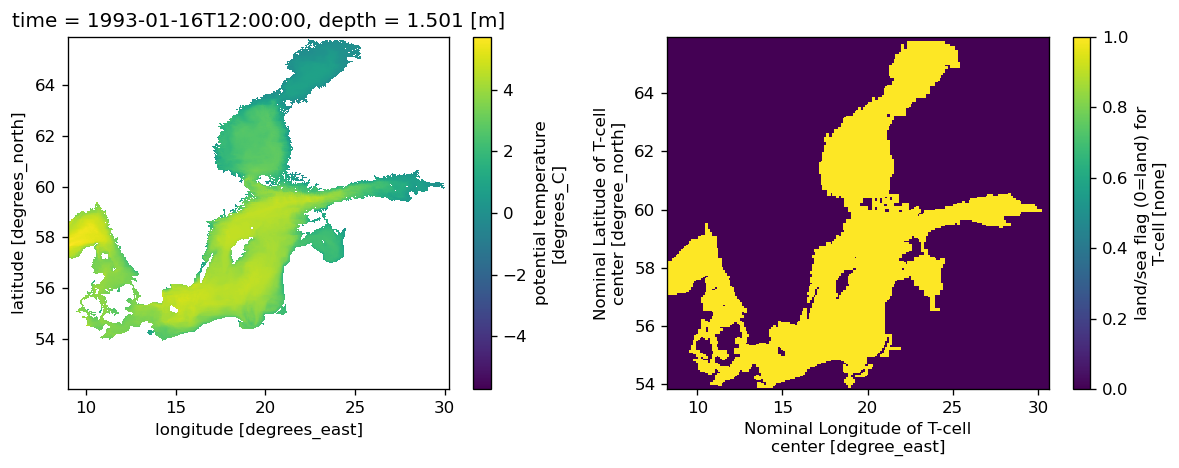

In [21]:
fig,ax = pl.subplots(1,2, figsize=(10,4), dpi = 120)
reanalysis.thetao.isel(time=0,depth=0).plot(ax=ax[0],cmap='viridis')
mom.wet.plot(ax=ax[1])
pl.tight_layout()

#### Should be easy, let's try 3 ways to do so:
* CDO interpolation;
* Scipy interpolation;
* Xarray interpolation.

In [25]:
!module load cdo && cdo remapbil,/silod3/thomas/pocNP/V04/R25/input/grid_spec.nc /silod4/naumov/grid_interpolation/test_4d.nc /silod4/naumov/grid_interpolation/test_4d_cdo.nc




	Module for cdo, cdo, version 1.9.10 loaded
Contains: cdo.
cdo    remapbil: Bilinear weights from lonlat (383x523) to lonlat (224x242) grid, with source mask (34955)
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Bilinear weights from lonlat (383x523) to lonlat (224x242) grid, with source mask (32714)
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapbil: Bilinear weights from lonlat (383x523) to lonlat (224x242) grid, with source mask (30964)
cdo    remapbil:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7

#### CDO interpolation

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1445: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1460: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


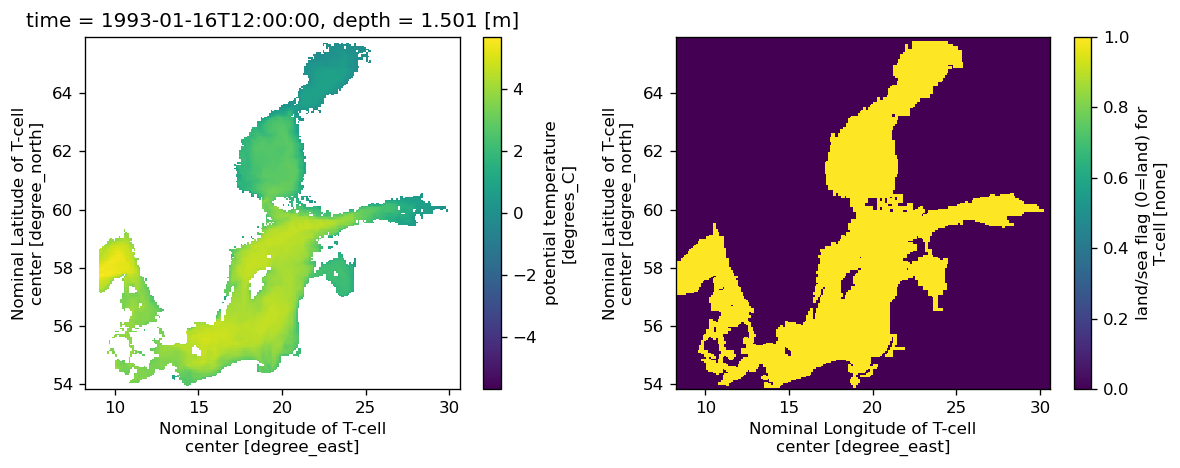

In [31]:
fig,ax = pl.subplots(1,2, figsize=(10,4), dpi = 120)
xr.open_dataset('/silod4/naumov/grid_interpolation/test_4d_cdo.nc').thetao.isel(time=0,depth=0).plot(ax=ax[0],cmap='viridis')
mom.wet.plot(ax=ax[1])
pl.tight_layout()

#### Scipy interpolation

In [35]:
#Define the interpolation constructor
lin_interp_2d = interp2d(reanalysis.longitude, reanalysis.latitude, reanalysis.thetao.isel(time=0,depth=0), kind='linear')
#Interpolate
interpolated_field = lin_interp_2d(mom.grid_x_T, mom.grid_y_T)

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


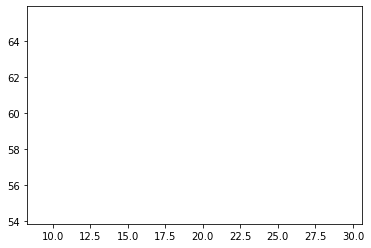

In [38]:
pl.pcolormesh(mom.grid_x_T, mom.grid_y_T, interpolated_field)

In [39]:
#Define the interpolation constructor
lin_interp_2d = interp2d(reanalysis.longitude, reanalysis.latitude, reanalysis.thetao.isel(time=0,depth=0).fillna(-999), kind='linear')
#Interpolate
interpolated_field = lin_interp_2d(mom.grid_x_T, mom.grid_y_T)

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


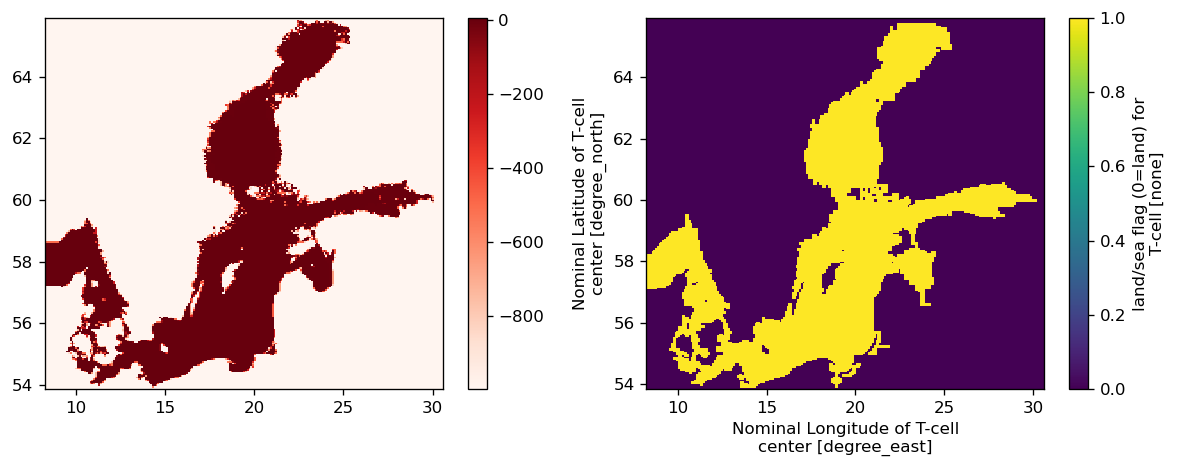

In [54]:
fig,ax = pl.subplots(1,2, figsize=(10,4), dpi = 120)
f = ax[0].pcolormesh(mom.grid_x_T, mom.grid_y_T, interpolated_field, cmap='Reds')
fig.colorbar(f, ax=ax[0])
mom.wet.plot(ax=ax[1])
pl.tight_layout()

#### Xarray interpolation

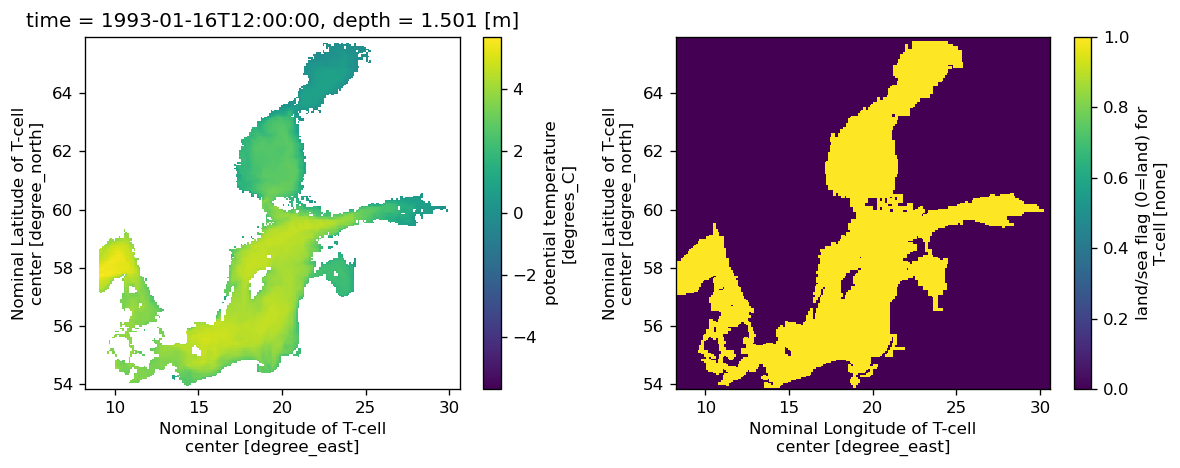

In [65]:
fig,ax = pl.subplots(1,2, figsize=(10,4), dpi = 120)
reanalysis.thetao.isel(time=0, depth=0).interp(method='linear', coords={'longitude': mom.grid_x_T, 'latitude': mom.grid_y_T}).plot(ax=ax[0],cmap='viridis')
mom.wet.plot(ax=ax[1])
pl.tight_layout()

#### My approach (interpolation script)

In [73]:
import sys 
import os
sys.path.append(os.path.abspath("/silod4/naumov/grid_interpolator/"))

In [74]:
import GridInterpolator as gint 

In [77]:
#Preparing the input information
var_info = gint.generate_vars_dictionary(input_names=['thetao'],
                                         output_names=['sst'],
                                         path2save=['/silod4/naumov/grid_interpolation/copernicus_phy_interpolated.nc'],
                                         grid_type=['t'])

#initializing the object
interpolator = gint.gridded_fields_interpolation(path2mom_grid='/silod3/thomas/pocNP/V04/R25/input/grid_spec.nc')

In [107]:
# We will need to crop the data a bit, so it fits to model grid (but in the future in should be possible to run the script anyway)
min_lon = 9.02
min_lat = float(mom.grid_y_T[1].data)
max_lon = 30.20
max_lat = float(mom.grid_y_T[-2].data)
crop = [min_lat, max_lat, min_lon, max_lon]

In [109]:
%%time

#performing interpolation
interpolator.interpolate_fields_to_model_grid(aux_variables=['longitude', 'latitude', 'depth', 'time'],
                                              variables=var_info,
                                              path2init_fields='/silod4/naumov/grid_interpolation/test_4d.nc',
                                              crop=crop,
                                              parallel=True,
                                              to_mom=True)

/silod4/naumov/grid_interpolator/GridInterpolator.py:101: UserWarning: Land-sea mask for u-grid has not been found, mask for t-grid will be used instead
  warnings.warn("Land-sea mask for u-grid has not been found, mask for t-grid will be used instead")


Since parallel calculations mode has been chosen, model domain will be split into the  16  pieces
Starting to interpolate variable:  thetao
Saving results...
CPU times: user 8.45 s, sys: 18 s, total: 26.5 s
Wall time: 4min 31s


#### Let's check the results

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1445: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1460: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


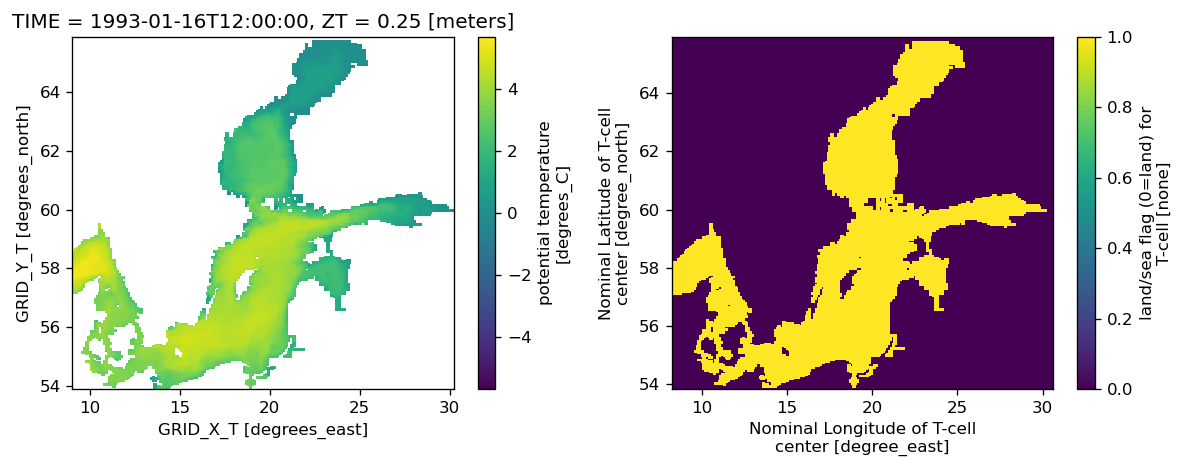

In [111]:
fig,ax = pl.subplots(1,2, figsize=(10,4), dpi = 120)
xr.open_dataset('/silod4/naumov/grid_interpolation/copernicus_phy_interpolated.nc').sst.isel(TIME=0,ZT=0).plot(ax=ax[0],cmap='viridis')
mom.wet.plot(ax=ax[1])
pl.tight_layout()

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1445: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1460: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)
/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1445: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/silos/

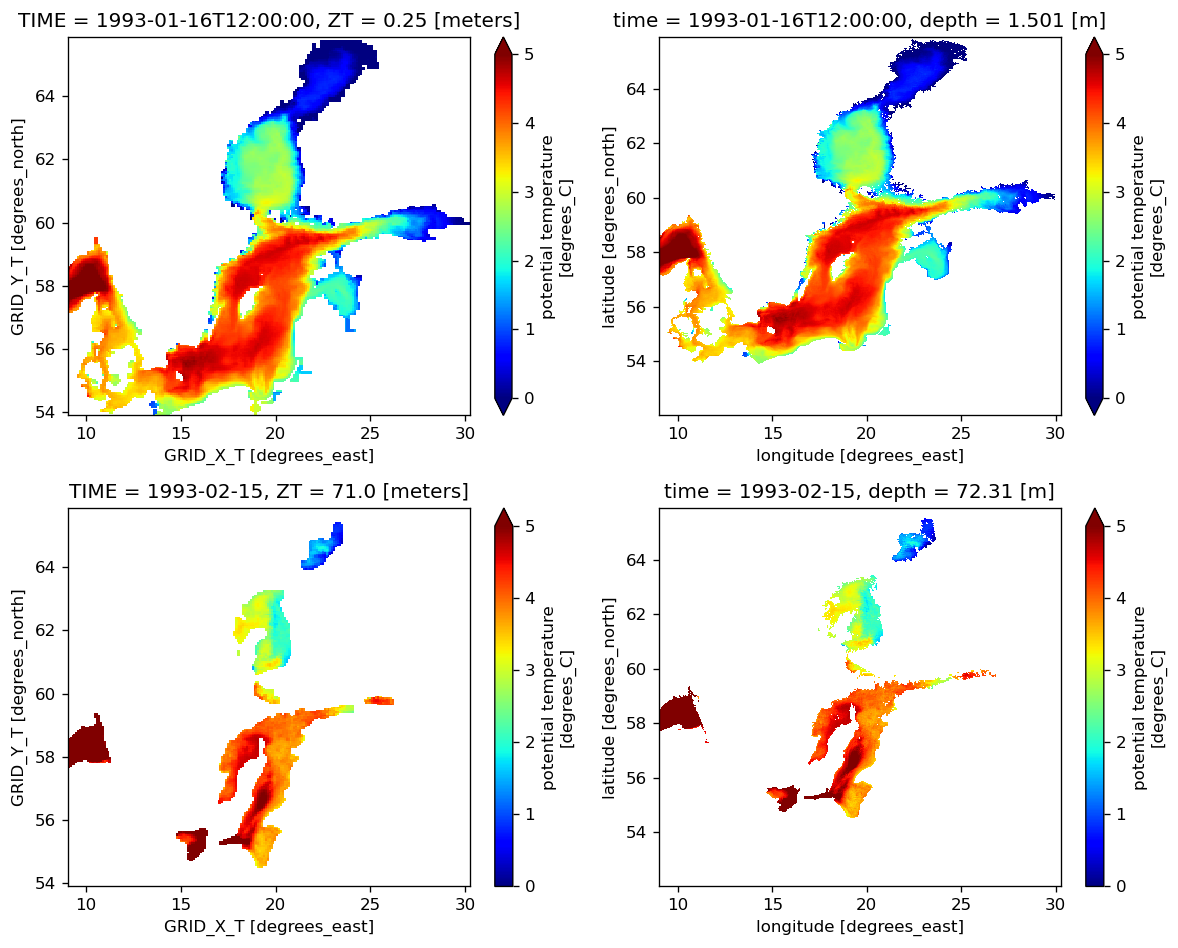

In [123]:
fig,ax = pl.subplots(2,2, figsize=(10,8), dpi = 120)
xr.open_dataset('/silod4/naumov/grid_interpolation/copernicus_phy_interpolated.nc').sst.isel(TIME=0,ZT=0).plot(ax=ax[0,0],
                                                                                                               cmap='jet', 
                                                                                                               vmin=0, 
                                                                                                               vmax=5)
reanalysis.thetao.isel(time=0,depth=0).plot(ax=ax[0,1],cmap='jet', vmin=0, vmax=5)

xr.open_dataset('/silod4/naumov/grid_interpolation/copernicus_phy_interpolated.nc').sst.sel(ZT=70, method='nearest').isel(TIME=1).plot(ax=ax[1,0],
                                                                                                               cmap='jet', 
                                                                                                               vmin=0, 
                                                                                                               vmax=5)
reanalysis.thetao.sel(depth=70, method='nearest').isel(time=1).plot(ax=ax[1,1],cmap='jet', vmin=0, vmax=5)

pl.tight_layout()

/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1445: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
/silos/conda_packages/naumov/miniconda3_4.8.2/OS_42.3/conda_env/iow_python/lib/python3.7/site-packages/xarray/plot/plot.py:1460: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


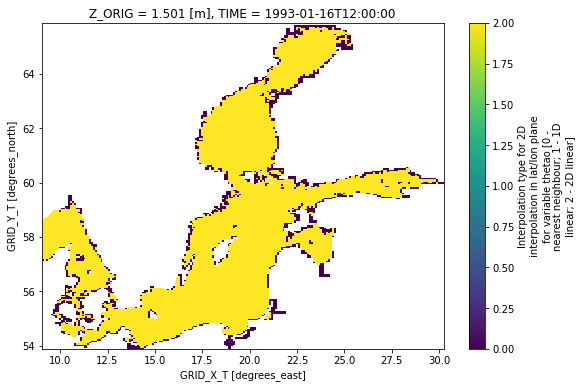

In [135]:
tmp = xr.open_dataset('/silod4/naumov/grid_interpolation/interpolation_log.nc').IntFlag_thetao.isel(TIME=0,Z_ORIG=0)
tmp = tmp.where(tmp < 10, np.nan)
tmp.plot(size=6)

## The script is available here: https://git.io-warnemuende.de/naumov/masked_grid_interpolation.git